# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.express as px



In [3]:
pd.options.display.max_rows = 100
pd.set_option('display.max_colwidth', None)

# EXPORT DATAS

In [4]:
songs_for_4_clusters = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_5000')

In [5]:
songs_for_4_clusters.columns = songs_for_4_clusters.columns.str.strip()

In [6]:
songs_for_4_clusters.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

## Set up the DF

In [7]:
songs_for_4_clusters = songs_for_4_clusters.copy()
songs_for_4_clusters.pop('id')
songs_for_4_clusters.pop('html')
songs_for_4_clusters.pop('duration_ms')
songs_for_4_clusters.pop('time_signature')
songs_for_4_clusters.pop('type')
songs_for_4_clusters.pop('mode')

songs_for_4_clusters = songs_for_4_clusters.set_index(['name', 'artist'])


In [8]:
songs_for_4_clusters.head(3)

danceability  \
name                                                                                                                                                                              artist                                                           
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                             0.658   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                     0.742   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                         0.851   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       0.259   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                               0.399   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                   0.730   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       11   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                2   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                    2   

                                                                                                                                                                                                                                    loudness  \
name                                                                                                                                                                              artist                                                       
Se Eu Quiser Falar Com Deus                                                                                                                                     

# CALCULATE HOW MANY MOTHER CLUSTERS

## Scales

Due to same process on 10 songs, we have seen that Minmax, Standard and Quantile Scaling are the most appropriate here.

In [9]:
#MinMax Scaler
min_max_df = MinMaxScaler().fit_transform(songs_for_4_clusters)
minmax = pd.DataFrame(min_max_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)

## Standard Scaler
Standard_df = StandardScaler().fit_transform(songs_for_4_clusters)
standard = pd.DataFrame(Standard_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Standard heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)


## Quantile Transformer
quantile_df = QuantileTransformer(n_quantiles=len(songs_for_4_clusters)).fit_transform(songs_for_4_clusters)
quantile = pd.DataFrame(quantile_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Quantile heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)


##### Inertia and Silhouette

In [10]:
max_k = 10

distance_inertia_list = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(standard_distances)
    distance_inertia_list.append(round(myKMeans.inertia_))

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [11]:
max_k = 10
distance_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(standard_distances).labels_
  distance_sil_score.append(silhouette_score(standard_distances, labels))

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

### With Quantile Scale

In [12]:
max_k = 10

quantile_inertia_list = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(quantile_distances)
    quantile_inertia_list.append(round(myKMeans.inertia_))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [13]:
max_k = 10
quantile_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(quantile_distances).labels_
  quantile_sil_score.append(silhouette_score(quantile_distances, labels))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

### With MinMax Scale

In [14]:
max_k = 10

inertia_list_minmax = []

for i in range(1, max_k):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(minmax_distances)
    inertia_list_minmax.append(round(myKMeans.inertia_))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

In [15]:
max_k = 10
sil_score_minmax = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(minmax_distances).labels_
  sil_score_minmax.append(silhouette_score(minmax_distances, labels))


/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Use

#### Plots Inertia And Silhouette scores

Text(0.5, 1.0, 'Silhouette Distance Scale')

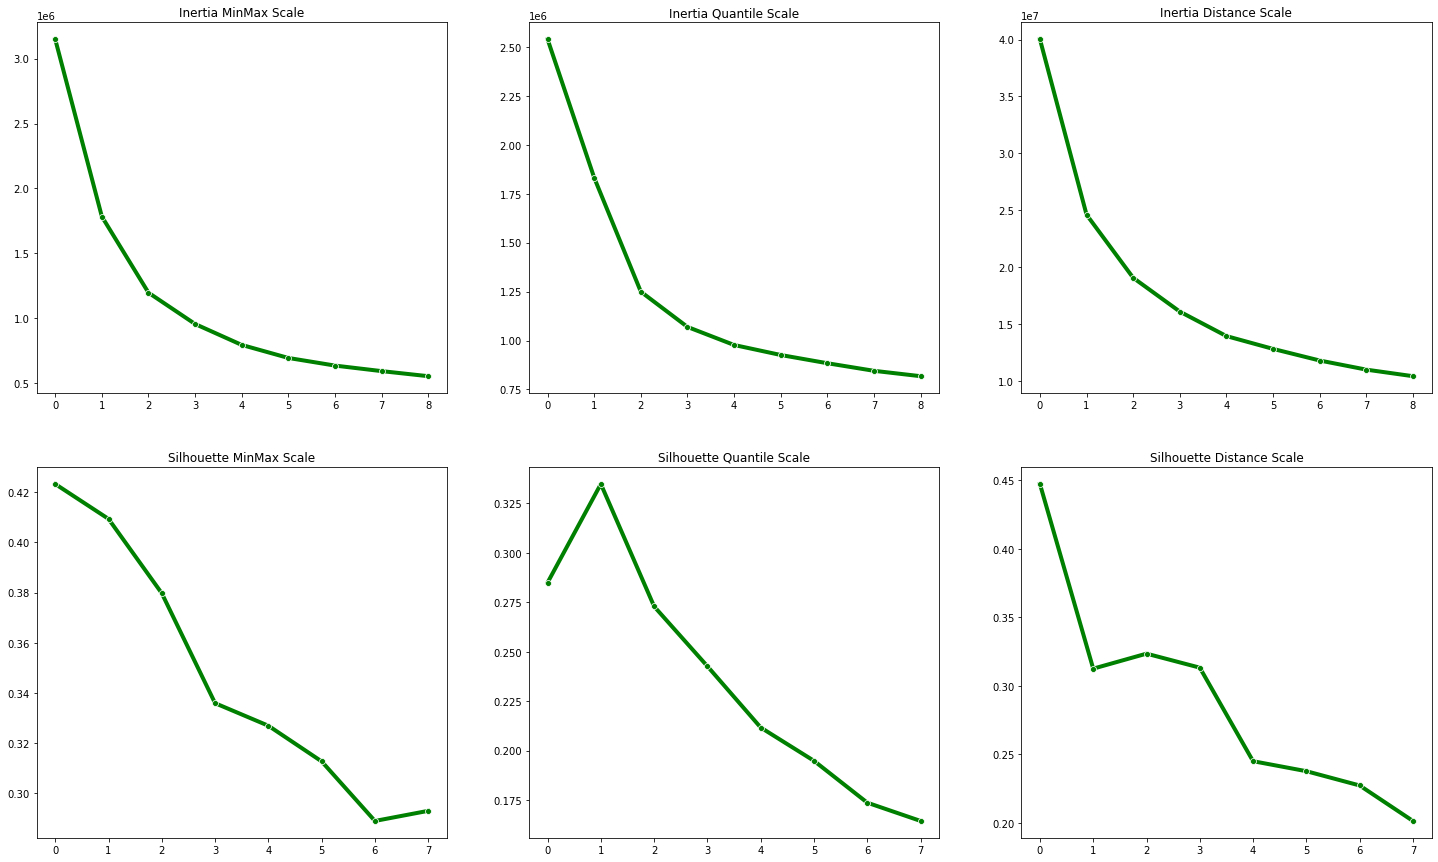

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

sns.lineplot(ax=axes[0,0], data=inertia_list_minmax, marker='o', color='green', linewidth=4)
sns.lineplot(ax=axes[1,0], data=sil_score_minmax, marker='o', color='green', linewidth=4)
sns.lineplot(ax=axes[0,1], data=quantile_inertia_list, marker='o', color='green', linewidth=4)
sns.lineplot(ax=axes[1,1], data=quantile_sil_score, marker='o', color='green', linewidth=4)
sns.lineplot(ax=axes[0,2], data=distance_inertia_list, marker='o', color='green', linewidth=4)
sns.lineplot(ax=axes[1,2], data=distance_sil_score, marker='o', color='green', linewidth=4)
axes[0,0].set_title("Inertia MinMax Scale")
axes[1,0].set_title("Silhouette MinMax Scale")
axes[0,1].set_title("Inertia Quantile Scale")
axes[1,1].set_title("Silhouette Quantile Scale")
axes[0,2].set_title("Inertia Distance Scale")
axes[1,2].set_title("Silhouette Distance Scale")



According to our graphs, MinMax scaling with 4 clusters is making the most sense

## CREATE MOTHER CLUSTERS

In [17]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(minmax_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(minmax_distances)
# 5. attach the cluster output to our original DataFrame
songs_for_4_clusters["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
songs_for_4_clusters = songs_for_4_clusters.reset_index()

### Create a DF of 5 songs / clusters to make sure it make sense

In [19]:
sample_results = (
    songs_for_4_clusters.groupby('cluster')[['name', 'artist', 'cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

sample_results

name  \
33   O Amor Em Paz                                                                                                                                                                       
21   Aquarela Do Brasil                                                                                                                                                                  
16   Não Sei                                                                                                                                                                             
18   Aquarela Do Brasil                                                                                                                                                                  
19   Brigas Nunca Mais                                                                                                                                                                   
14   Mas Que Nada                                                                                                                                                                        
1    Saudade De Bahia                                                                                                                                                                    
2      Canta Canta, Minha Gente                                                                                                                                                          
8    Brigas Nunca Mais                                                                                                                                                                   
12   Aqua De Coco                                                                                                                                                                        
202  Under Your Spell                                                                                                                                                                    
199  Oats In The Water                                                                                                                                                                   
138  Manada                                                                                                                                                                              
211  How to Disappear Completely                                                                                                                                                         
209  La Nueva Reconquista de Graná                                                                                                                                                       
6    Madalena                                                                                                                                                                            
5    Desafinado                                                                                                                                                                          
4    Rosa Morena                                                                                                                                                                         
3    Mulher Eu Sei                                                                                                                                                                       
0    Se Eu Quiser Falar Com Deus                                                                                                                                                         

                                               artist  cluster  danceability  \
33   Cannonball Adderley                                     0         0.682   
21   Voyager                                                 0         0.449   
16   Sílvia Pérez Cruz         

### Calculate the mean of each parameters to be able to plot them and get an inside of each parameters

In [20]:
results_4_clusters = (
    songs_for_4_clusters.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

results_4_clusters

key    energy   loudness  acousticness       tempo  \
cluster                                                            
0        5.131298  0.125336 -22.040534      0.939301  104.305608   
1        5.345395  0.757910  -6.268142      0.116393  121.336603   
2        5.345821  0.900095  -7.957723      0.014926  122.282362   
3        4.926526  0.409308 -11.226361      0.708775  116.953313   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.778328     0.045550  0.156501  
1                0.024243     0.089554  0.563147  
2                0.697281     0.107095  0.237377  
3                0.056233     0.061143  0.537781

In [21]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(results_4_clusters)

scaled_results_4_clusters = my_std_scaler.transform(results_4_clusters)

results_4_clusters_distance = pd.DataFrame(scaled_results_4_clusters,index=results_4_clusters.index, columns=results_4_clusters.columns)
results_4_clusters_distance = results_4_clusters_distance.reset_index()

results_4_clusters_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0 -0.321411 -1.397986 -1.657336      1.269437 -1.662489   
1        1  0.908227  0.693488  0.913655     -0.843264  0.714057   
2        2  0.910677  1.163591  0.638244     -1.103767  0.846030   
3        3 -1.497493 -0.459092  0.105437      0.677594  0.102402   

   instrumentalness  speechiness   valence  
0          1.111857    -1.263414 -1.211484  
1         -1.041804     0.572291  1.056674  
2          0.880388     1.304061 -0.760379  
3         -0.950441    -0.612938  0.915189

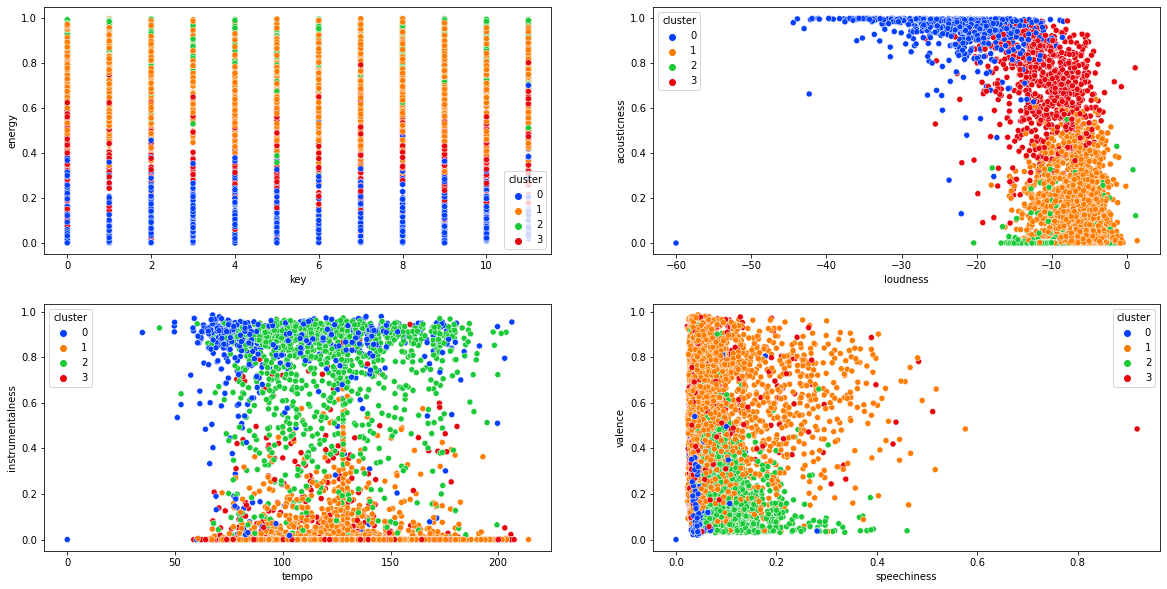

In [22]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = songs_for_4_clusters
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

In [23]:

clusters_4_3D = px.scatter_3d(
    songs_for_4_clusters, 
    x='loudness', 
    y='acousticness', 
    z='instrumentalness'
    ,color = songs_for_4_clusters['cluster']
    )
clusters_4_3D.update_layout(margin=dict(l=0, r=0, b=0, t=0))
clusters_4_3D.update_traces(marker_size=3, selector=dict(type='scatter3d'))
#clusters_4_3D.update_traces(marker_color=[<VALUE>], selector=dict(type='scatter3d'))

clusters_4_3D.show()

In [24]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig.add_trace(go.Scatterpolar(
      r=[results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'key'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'energy'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'loudness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'acousticness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'tempo'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'instrumentalness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'speechiness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="darkblue")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig.add_trace(go.Scatterpolar(
      r=[results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'key'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'energy'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'loudness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'acousticness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'tempo'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'instrumentalness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'speechiness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="light green")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig.add_trace(go.Scatterpolar(
      r=[results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'key'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'energy'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'loudness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'acousticness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'tempo'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'instrumentalness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'speechiness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="orange")
))

# add a layer over the top of the initialised plot - this one is for cluster 3
fig.add_trace(go.Scatterpolar(
      r=[results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'key'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'energy'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'loudness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'acousticness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'tempo'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'instrumentalness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'speechiness'].mean(),
        results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="yellow")
))

# # add a layer over the top of the initialised plot - this one is for cluster 4
# fig.add_trace(go.Scatterpolar(
#       r=[results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'key'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'energy'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'loudness'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'acousticness'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'tempo'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'instrumentalness'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'speechiness'].mean(),
#         results_4_clusters_distance.loc[results_4_clusters_distance["cluster"] == 4, 'valence'].mean()],
#       theta=categories,
#       fill='toself',
#       name='Cluster 4',
#       marker=dict(color="yellow")
# ))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

# CREATE SUBCLUSTERS

In [25]:
songs_for_4_clusters.groupby('cluster')['name'].count()

cluster
0     655
1    2736
2    1041
3     803
Name: name, dtype: int64

Create a DF for each 'mother' cluster

In [26]:
cluster_0 = songs_for_4_clusters.loc[songs_for_4_clusters.cluster == 0,:]
cluster_1 = songs_for_4_clusters.loc[songs_for_4_clusters.cluster == 1,:]
cluster_2 = songs_for_4_clusters.loc[songs_for_4_clusters.cluster == 2,:]
cluster_3 = songs_for_4_clusters.loc[songs_for_4_clusters.cluster == 3,:]

cluster_0 = cluster_0.set_index(['name', 'artist'])
cluster_1 = cluster_1.set_index(['name', 'artist'])
cluster_2 = cluster_2.set_index(['name', 'artist'])
cluster_3 = cluster_3.set_index(['name', 'artist'])

In [27]:
cluster_0.head(5)


danceability  \
name                                                                                                                                                                              artist                                                           
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                        0.382   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                      0.423   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                           0.529   
Aquarela Do Brasil                                                                                                                                                                Voyager                                                  0.449   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                      0.682   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                 0.0866   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                               0.2520   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                    0.2760   
Aquarela Do Brasil                                                                                                                                                                Voyager                                           0.1450   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                               0.2810   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                   1   
Aquarela Do Brasil                                                                                                                                 

## Cluster 0

### Scaling

In [28]:
#MinMax Scaler
cluster_0_Scaler = MinMaxScaler().fit_transform(cluster_0)
minmax0 = pd.DataFrame(cluster_0_Scaler, columns=cluster_0.columns, index=cluster_0.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_0_distances = pd.DataFrame(pairwise_distances(minmax0), index=cluster_0.index, columns=cluster_0.index)

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



<AxesSubplot:>

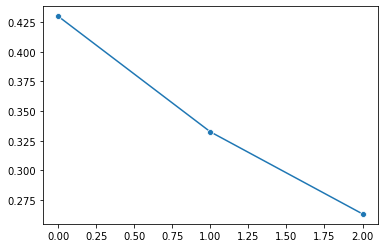

In [29]:
max_k = 5
distance_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(cluster_0_distances).labels_
  distance_sil_score.append(silhouette_score(cluster_0_distances, labels))


sns.lineplot(data=distance_sil_score, marker='o')


In [30]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 3, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_0_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_0_distances)
# 5. attach the cluster output to our original DataFrame
cluster_0["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



### Scatterplots to see parameters / Cluster

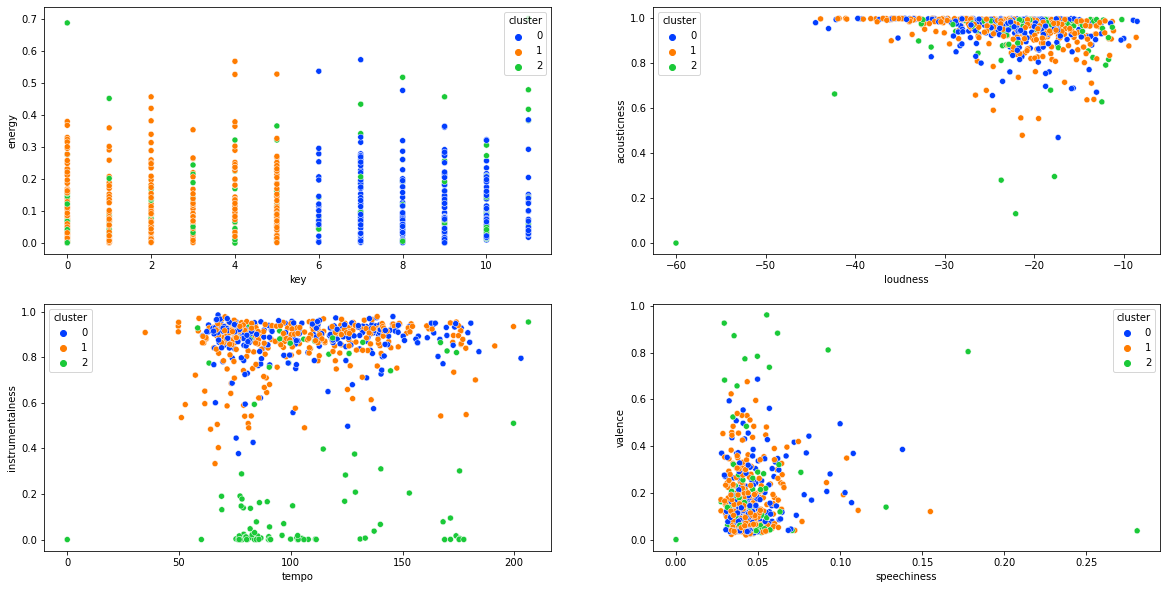

In [31]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = cluster_0
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = cluster_0
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = cluster_0
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = cluster_0
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Key and instrumentalness seem to be a indicator of the clusters.

### Create a DF of 5 songs / clusters to make sure if the cluster makes sense

In [32]:
sample_results_0 = (
    cluster_0.groupby('cluster')[['cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

sample_results_0

cluster  \
name                                                                                                                                                                              artist                                                      
Aquarela Do Brasil                                                                                                                                                                Voyager                                                 0   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                     0   
Paranoid Android                                                                                                                                                                  Brad Mehldau                                            0   
Sigur 1 (Untitled)                                                                                                                                                                Sigur Rós                                               0   
Albatross - 2018 Remaster                                                                                                                                                         Fleetwood Mac                                           0   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                     1   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                          1   
Triste                                                                                                                                                                            Brazilian Jazz                                          1   
Apelo                                                                                                                                                                             Brazilian Jazz                                          1   
Insensatez                                                                                                                                                                        Stan Getz                                               1   
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                       2   
O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                    João Gilberto                                           2   
O Que É, O Que É                                                                                                                                                                  Cesar Camargo Mariano & Romero Lubambo                  2   
Samba Da Minha Terra - Live At Carnegie Hall/1964                                                                                                                                 Stan Getz                                               2   
Coisa Feita                                                                                                                                                                       Toots Thielemans                                        2   

                                                                                                                                                                    

### Calculate the mean of each parameter to see what parameter is making a big difference between clusters

In [33]:
cluster_0_results = (
    cluster_0.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

cluster_0_results

key    energy   loudness  acousticness       tempo  \
cluster                                                            
0        8.419355  0.118519 -22.289339      0.947871  106.183964   
1        2.408360  0.121150 -22.404183      0.940997  101.877389   
2        5.458333  0.156506 -20.219719      0.911667  107.319604   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.877040     0.045763  0.146583  
1                0.862913     0.044214  0.152637  
2                0.249302     0.049332  0.194642

In [34]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(cluster_0_results)

cluster_0_distance = my_std_scaler.transform(cluster_0_results)

cluster_0_distance = pd.DataFrame(cluster_0_distance,index=cluster_0_results.index, columns=cluster_0_results.columns)
cluster_0_distance = cluster_0_distance.reset_index()

cluster_0_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0  1.218659 -0.781682  -0.64913      0.914648  0.450907   
1        1 -1.230741 -0.629811  -0.76354      0.476787 -1.386277   
2        2  0.012082  1.411493   1.41267     -1.391435  0.935371   

   instrumentalness  speechiness   valence  
0          0.731106    -0.314158 -0.843998  
1          0.682833    -1.037065 -0.560727  
2         -1.413939     1.351222  1.404725

#### Radar Chart

In [35]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig0 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig0.add_trace(go.Scatterpolar(
      r=[cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'key'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'energy'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'loudness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'acousticness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'tempo'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'instrumentalness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'speechiness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="yellow")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig0.add_trace(go.Scatterpolar(
      r=[cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'key'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'energy'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'loudness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'acousticness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'tempo'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'instrumentalness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'speechiness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig0.add_trace(go.Scatterpolar(
      r=[cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'key'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'energy'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'loudness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'acousticness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'tempo'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'instrumentalness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'speechiness'].mean(),
        cluster_0_distance.loc[cluster_0_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig0.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig0.show()

## Cluster 1

### Scaling

In [36]:
#MinMax Scaler
Cluster_1_Scaler = MinMaxScaler().fit_transform(cluster_1)
minmax1 = pd.DataFrame(Cluster_1_Scaler, columns=cluster_1.columns, index=cluster_1.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_1_distances = pd.DataFrame(pairwise_distances(minmax1), index=cluster_1.index, columns=cluster_1.index)

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/ut

<AxesSubplot:>

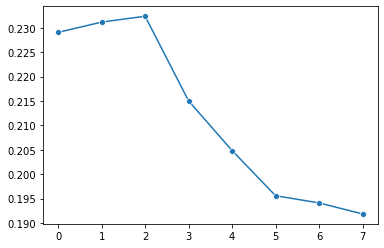

In [37]:
max_k = 10
distance_sil_score = []

for j in range(2, max_k):
  labels = KMeans(n_clusters=j).fit(cluster_1_distances).labels_
  distance_sil_score.append(silhouette_score(cluster_1_distances, labels))


sns.lineplot(data=distance_sil_score, marker='o')


### KMean


In [38]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 7, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_1_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_1_distances)
# 5. attach the cluster output to our original DataFrame
cluster_1["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [39]:
cluster_1.head(5)

danceability  \
name                                                                                                                                                                              artist                                                           
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                     0.742   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                         0.851   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                        0.694   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                             0.755   
Mas Que Nada                                                                                                                                                                      Rio Combo                                                0.618   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                               0.399   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                   0.730   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                  0.546   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                       0.732   
Mas Que Nada                                                                                                                                                                      Rio Combo                                          0.539   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                2   
Canta Canta, Minha Gente                                                                                                                           

### Scatterplots to see parameters / Cluster

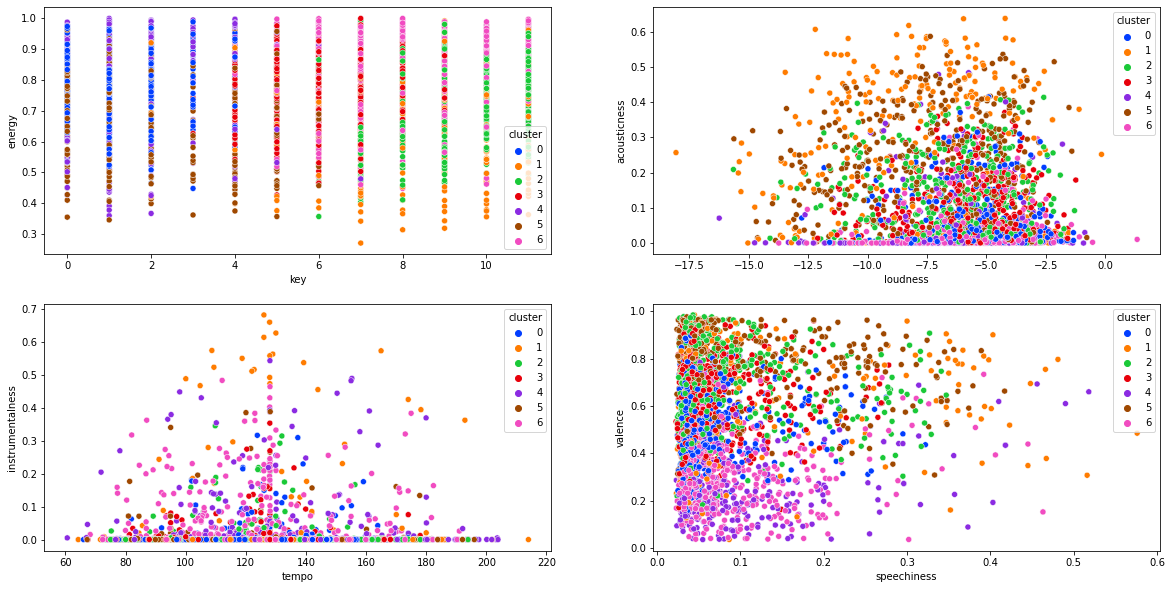

In [40]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = cluster_1
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = cluster_1
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = cluster_1
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = cluster_1
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Key, valence and energy seem to be the indicators of the clustering.

### create a DF with 5 songs from each cluster to make sure clusters makes sense

In [41]:
sample_results_1 = (
    cluster_1.groupby('cluster')[['cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

sample_results_1

cluster  \
name                                                                                                                                                                              artist                                                      
It's Real                                                                                                                                                                         Real Estate                                             0   
Odessa                                                                                                                                                                            Caribou                                                 0   
Good for Nothin'                                                                                                                                                                  Scott Walker                                            0   
Maroca                                                                                                                                                                            Mundo Livre                                             0   
Plants                                                                                                                                                                            Beach Beach                                             0   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                        1   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                       1   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                            1   
Os Grilos                                                                                                                                                                         Marcos Valle                                            1   
Laia Ladia                                                                                                                                                                        Brazilian Jazz                                          1   
Far From Any Road                                                                                                                                                                 The Handsome Family                                     2   
Magalenha                                                                                                                                                                         Sérgio Mendes                                           2   
Dolcenera                                                                                                                                                                         Fabrizio De André                                       2   
There Is An End                                                                                                                                                                   Craig James Fox                                         2   
Parabens                                                                                                                                                                          Marcos Valle                                            2   
Les Dones Macabres                                                                                                                                                   

### Calculate means of all parameters to be able to compare then

In [42]:
cluster_1_results = (
    cluster_1.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

cluster_1_results

key    energy  loudness  acousticness       tempo  \
cluster                                                           
0        1.359909  0.784802 -5.394216      0.065945  122.088503   
1        8.086957  0.646514 -8.096858      0.306999  122.634186   
2        9.379157  0.726501 -6.298663      0.119348  118.140969   
3        6.011561  0.764048 -5.574742      0.088483  117.235686   
4        1.817121  0.806553 -6.566735      0.045564  130.596603   
5        1.931472  0.684838 -7.322099      0.223638  117.469317   
6        8.047281  0.861097 -5.736466      0.028978  126.195052   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.010537     0.068542  0.540323  
1                0.055301     0.118616  0.644748  
2                0.010615     0.088487  0.678698  
3                0.007887     0.071156  0.626457  
4                0.054695     0.106089  0.289474  
5                0.008505     0.103680  0.785348  
6                0.050644     0.094485  0.296459

In [43]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(cluster_1_results)

cluster_1_distance = my_std_scaler.transform(cluster_1_results)

cluster_1_distance = pd.DataFrame(cluster_1_distance,index=cluster_1_results.index, columns=cluster_1_results.columns)
cluster_1_distance = cluster_1_distance.reset_index()

cluster_1_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0 -1.212557  0.460602  1.125503     -0.627288  0.007999   
1        1  0.893304 -1.572912 -1.819454      1.908937  0.125876   
2        2  1.297819 -0.396705  0.139965     -0.065415 -0.844739   
3        3  0.243614  0.155421  0.928792     -0.390152 -1.040296   
4        4 -1.069430  0.780444 -0.152143     -0.841724  1.845901   
5        5 -1.033633 -1.009365 -0.975232      1.031869 -0.989828   
6        6  0.880883  1.582515  0.752568     -1.016228  0.895087   

   instrumentalness  speechiness   valence  
0         -0.811090    -1.433343 -0.064000  
1          1.231542     1.500261  0.526369  
2         -0.807535    -0.264829  0.718308  
3         -0.932021    -1.280203  0.422957  
4          1.203900     0.766355 -1.482190  
5         -0.903816     0.625221  1.321254  
6          1.019021     0.086538 -1.442699

#### Radar Chart

In [44]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig1 = go.Figure()
fig1_2 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig1.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="yellow")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig1.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig1.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig1.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 3, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 3',
      marker=dict(color="pink")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig1_2.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 4, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 4',
      marker=dict(color="blue")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig1_2.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 5, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 5',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig1_2.add_trace(go.Scatterpolar(
      r=[cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'key'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'energy'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'loudness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'acousticness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'tempo'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'instrumentalness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'speechiness'].mean(),
        cluster_1_distance.loc[cluster_1_distance["cluster"] == 6, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 6',
      marker=dict(color="yellow")
))


# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig1.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)


# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig1_2.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig1.show()
fig1_2.show()

In [45]:
cluster_1.cluster = cluster_1.cluster + cluster_0.cluster.max()
cluster_1.cluster.value_counts()

5    519
4    451
2    439
8    423
7    394
6    257
3    253
Name: cluster, dtype: int64

## Cluster 2

In [46]:
cluster_2.head(5)

danceability  \
name                                                                                                                                                                              artist                                                           
Manada                                                                                                                                                                            Bagunço                                                  0.651   
Oats In The Water                                                                                                                                                                 Ben Howard                                               0.364   
Under Your Spell                                                                                                                                                                  Desire                                                   0.572   
La Nueva Reconquista de Graná                                                                                                                                                     Grupo De Expertos Solynieve                              0.229   
How to Disappear Completely                                                                                                                                                       Radiohead                                                0.168   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Manada                                                                                                                                                                            Bagunço                                            0.485   
Oats In The Water                                                                                                                                                                 Ben Howard                                         0.475   
Under Your Spell                                                                                                                                                                  Desire                                             0.599   
La Nueva Reconquista de Graná                                                                                                                                                     Grupo De Expertos Solynieve                        0.640   
How to Disappear Completely                                                                                                                                                       Radiohead                                          0.302   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Manada                                                                                                                                                                            Bagunço                                             9   
Oats In The Water                                                                                                                                  

### Scaling

In [47]:
#MinMax Scaler
Cluster_2_Scaler = MinMaxScaler().fit_transform(cluster_2)
minmax2 = pd.DataFrame(Cluster_2_Scaler, columns=cluster_2.columns, index=cluster_2.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_2_distances = pd.DataFrame(pairwise_distances(minmax2), index=cluster_2.index, columns=cluster_2.index)

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/ut

<AxesSubplot:>

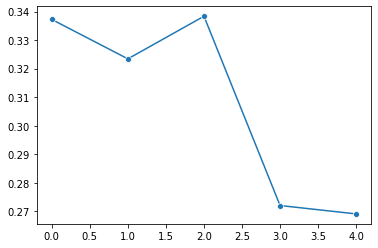

In [48]:
max_k = 7
distance_sil_score = []

for j in range(2, max_k):
    labels = KMeans(n_clusters=j).fit(cluster_2_distances).labels_
    distance_sil_score.append(silhouette_score(cluster_2_distances, labels))


sns.lineplot(data=distance_sil_score, marker='o')

### KMean


In [49]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_2_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_2_distances)
# 5. attach the cluster output to our original DataFrame
cluster_2["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



### Scatterplots to see parameters / Cluster

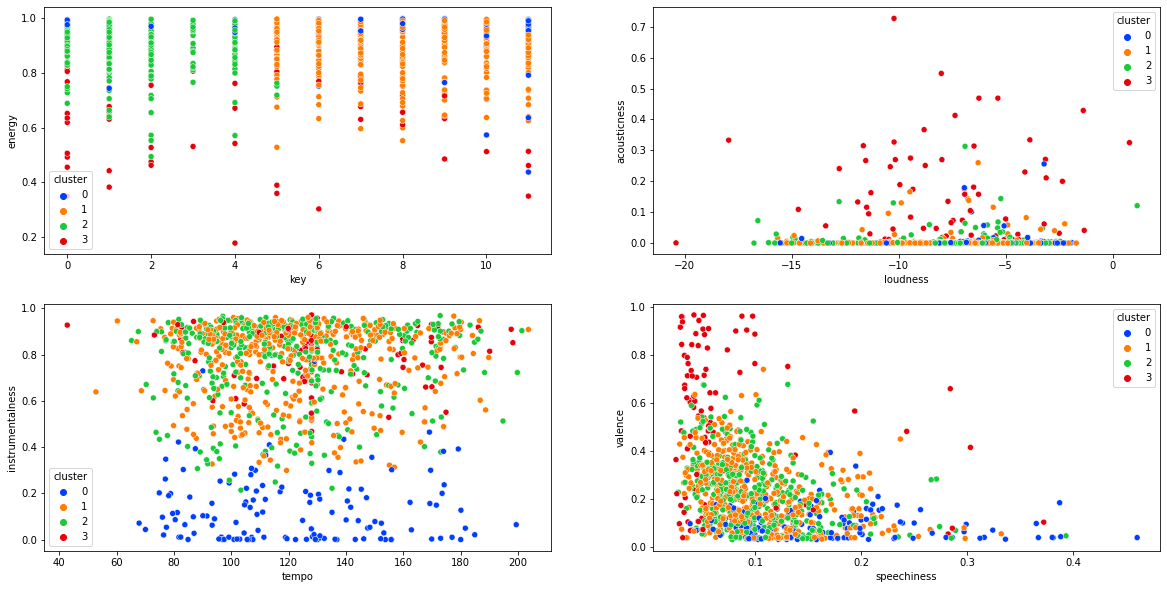

In [50]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = cluster_2
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = cluster_2
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = cluster_2
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = cluster_2
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Key, Instrumentalness and speechiness seem to be the indicators of the clustering

### Create a DF of 5 songs / cluster to make sure clustering make sense

In [51]:
sample_results_2 = (
    cluster_2.groupby('cluster')[['cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

sample_results_2

cluster  \
name                                                                                                                                                                              artist                                                      
You Can't Bring Me Down                                                                                                                                                           Suicidal Tendencies                                     0   
Raining Blood                                                                                                                                                                     Slayer                                                  0   
Dusk Till Dawn - Radio Edit                                                                                                                                                       ZAYN                                                    0   
South Of Heaven                                                                                                                                                                   Slayer                                                  0   
Let's Get Out Of Here                                                                                                                                                             Les Savy Fav                                            0   
Under Your Spell                                                                                                                                                                  Desire                                                  1   
Afternoon                                                                                                                                                                         Baxter Dury                                             1   
Come Saturday                                                                                                                                                                     The Pains Of Being Pure At Heart                        1   
San Francisco                                                                                                                                                                     Foxygen                                                 1   
Absolutely Cuckoo                                                                                                                                                                 The Magnetic Fields                                     1   
Nosedive                                                                                                                                                                          Wolf Alice                                              2   
There She Goes                                                                                                                                                                    The La's                                                2   
Shout                                                                                                                                                                             Lulu And The Luvvers                                    2   
Que No Sea Kang, Por Favor                                                                                                                                                        Los Planetas                                            2   
Red Eyes                                                                                                                                                                          The War On Drugs                                        2   
California Dreamin' - Remastered                                                                                                                                     

### Calculate the mean of each parameter / cluster to be able to plot the differences

In [52]:
cluster_2_results = (
    cluster_2.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

cluster_2_results

key    energy  loudness  acousticness       tempo  \
cluster                                                           
0        6.923077  0.956285 -6.577931      0.005948  121.630654   
1        8.045662  0.908986 -8.272897      0.003990  121.203986   
2        1.699732  0.910019 -8.220378      0.005270  121.227759   
3        5.070000  0.751090 -7.391290      0.110507  131.786540   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.136383     0.164842  0.093778  
1                0.769614     0.103690  0.226896  
2                0.778858     0.100015  0.226530  
3                0.805350     0.073344  0.510425

In [53]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(cluster_2_results)

cluster_2_distance = my_std_scaler.transform(cluster_2_results)

cluster_2_distance = pd.DataFrame(cluster_2_distance,index=cluster_2_results.index, columns=cluster_2_results.columns)
cluster_2_distance = cluster_2_distance.reset_index()

cluster_2_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0  0.619179  0.960877  1.495886     -0.558049 -0.515774   
1        1  1.086160  0.352388 -0.947492     -0.600911 -0.610158   
2        2 -1.553663  0.365670 -0.871783     -0.572886 -0.604900   
3        3 -0.151676 -1.678935  0.323389      1.731846  1.730832   

   instrumentalness  speechiness   valence  
0         -1.730163     1.622795 -1.122166  
1          0.523364    -0.202447 -0.246698  
2          0.556260    -0.312142 -0.249107  
3          0.650539    -1.108206  1.617971

#### Radar Chart

In [54]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig2 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig2.add_trace(go.Scatterpolar(
      r=[cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'key'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'energy'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'loudness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'acousticness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'tempo'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'instrumentalness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'speechiness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig2.add_trace(go.Scatterpolar(
      r=[cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'key'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'energy'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'loudness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'acousticness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'tempo'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'instrumentalness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'speechiness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig2.add_trace(go.Scatterpolar(
      r=[cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'key'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'energy'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'loudness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'acousticness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'tempo'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'instrumentalness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'speechiness'].mean(),
        cluster_2_distance.loc[cluster_2_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig2.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig2.show()

In [55]:
cluster_2.cluster = cluster_2.cluster + cluster_1.cluster.max()
cluster_2.cluster.value_counts()

9     438
10    373
8     130
11    100
Name: cluster, dtype: int64

## Cluster 3

### Scaling

In [56]:
#MinMax Scaler
cluster_3_Scaler = MinMaxScaler().fit_transform(cluster_3)
minmax3 = pd.DataFrame(cluster_3_Scaler, columns=cluster_3.columns, index=cluster_3.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_3_distances = pd.DataFrame(pairwise_distances(minmax3), index=cluster_3.index, columns=cluster_3.index)

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



<AxesSubplot:>

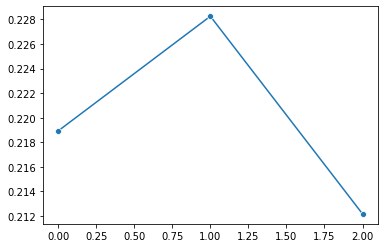

In [57]:
max_k = 5
distance_sil_score = []

for j in range(2, max_k):
    labels = KMeans(n_clusters=j).fit(cluster_3_distances).labels_
    distance_sil_score.append(silhouette_score(cluster_3_distances, labels))


sns.lineplot(data=distance_sil_score, marker='o')

### KMean


In [58]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_3_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_3_distances)
# 5. attach the cluster output to our original DataFrame
cluster_3["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [59]:
cluster_3.head(5)

danceability  \
name                                                                                                                                                                              artist                                                           
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                             0.658   
Mulher Eu Sei                                                                                                                                                                     Chico César                                              0.705   
Rosa Morena                                                                                                                                                                       Kurt Elling                                              0.651   
Desafinado                                                                                                                                                                        Stan Getz                                                0.466   
Madalena                                                                                                                                                                          Maria Gasolina                                           0.675   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                      0.2590   
Mulher Eu Sei                                                                                                                                                                     Chico César                                       0.0502   
Rosa Morena                                                                                                                                                                       Kurt Elling                                       0.1190   
Desafinado                                                                                                                                                                        Stan Getz                                         0.1460   
Madalena                                                                                                                                                                          Maria Gasolina                                    0.2070   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       11   
Mulher Eu Sei                                                                                                                                      

### Scatterplots to see parameters / Cluster

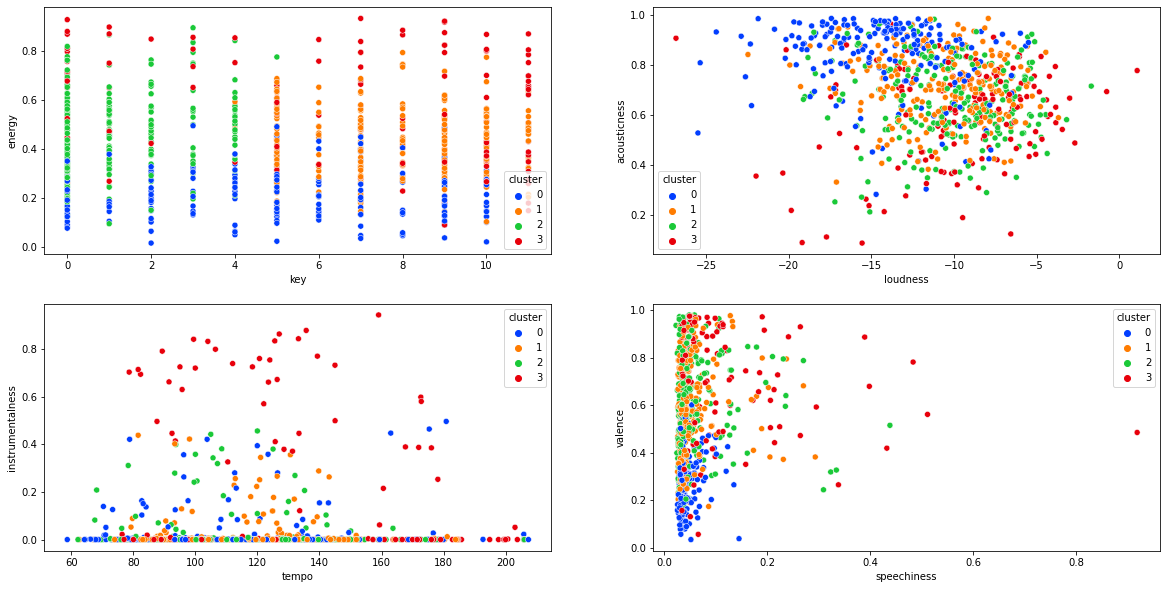

In [60]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = cluster_3
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = cluster_3
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = cluster_3
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = cluster_3
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Key, energy, acousticness and valence seem to be the indicators of clustering

### Create a DF with 5 songs / cluster to make sure the clusters make sense

In [61]:
sample_results_3 = (
    cluster_3.groupby('cluster')[['cluster','danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence' ]]
    .head(5).sort_values(by='cluster')
)

sample_results_3

cluster  \
name                                                                                                                                                                              artist                                                      
Mulher Eu Sei                                                                                                                                                                     Chico César                                             0   
Rosa Morena                                                                                                                                                                       Kurt Elling                                             0   
Desafinado                                                                                                                                                                        Stan Getz                                               0   
The Girl From Ipanema                                                                                                                                                             Stan Getz                                               0   
A Força Que Nunca Seca (feat. Maria Bethânia)                                                                                                                                     Chico César                                             0   
Once Again                                                                                                                                                                        Stan Getz                                               1   
Kaipuusamba                                                                                                                                                                       Maria Gasolina                                          1   
Karoliina Kaunis                                                                                                                                                                  Maria Gasolina                                          1   
Rebel Rebel                                                                                                                                                                       Seu Jorge                                               1   
Team Zissou                                                                                                                                                                       Seu Jorge                                               1   
Don't Stop the Carnival                                                                                                                                                           Sonny Rollins                                           2   
Chega De Saudade                                                                                                                                                                  João Gilberto                                           2   
Samba de Verão                                                                                                                                                                    Marcos Valle                                            2   
Previsao                                                                                                                                                                          Bossacucanova                                           2   
Águas De Março                                                                                                                                                                    Antônio Carlos Jobim                                    2   
Nova Bossa Nova                                                                                                                                                      

### Calculate the mean of each parameter to be able to plot them and see differences

In [62]:
cluster_3_results = (
    cluster_3.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

cluster_3_results

key    energy   loudness  acousticness       tempo  \
cluster                                                            
0        4.893401  0.214449 -14.253345      0.838213  112.060751   
1        7.690377  0.431272 -10.638339      0.714255  116.830360   
2        1.318966  0.459414 -10.185034      0.659578  112.957168   
3        6.281481  0.568666  -9.639763      0.594736  131.177948   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.035225     0.044377  0.284544  
1                0.025389     0.053278  0.593427  
2                0.027469     0.060338  0.611851  
3                0.190925     0.100916  0.681517

In [63]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(cluster_3_results)

cluster_3_distance = my_std_scaler.transform(cluster_3_results)

cluster_3_distance = pd.DataFrame(cluster_3_distance,index=cluster_3_results.index, columns=cluster_3_results.columns)
cluster_3_distance = cluster_3_distance.reset_index()

cluster_3_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0 -0.064461 -1.587863 -1.698679      1.526097 -0.807536   
1        1  1.116602  0.099800  0.298812      0.140403 -0.185885   
2        2 -1.573817  0.318844  0.549287     -0.470824 -0.690701   
3        3  0.521676  1.169218  0.850580     -1.195676  1.684121   

   instrumentalness  speechiness   valence  
0         -0.492855    -0.940175 -1.691486  
1         -0.633257    -0.528947  0.331316  
2         -0.603567    -0.202756  0.451971  
3          1.729678     1.671878  0.908199

#### Radar Chart

In [64]:
# state the label for each arm of the chart
categories = ['energy', 'loudness', 'acousticness','tempo ','instrumentalness','key','speechiness', 'valence']

# plot the initialised plot
fig3 = go.Figure()

# add a layer over the top of the initialised plot - this one is for cluster 0
fig3.add_trace(go.Scatterpolar(
      r=[cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'key'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'energy'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'loudness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'acousticness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'tempo'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'instrumentalness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'speechiness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 0, 'valence'].mean()
],
      theta=categories,
      fill='toself',
      name='Cluster 0',
      marker=dict(color="green")
))

# add a layer over the top of the initialised plot - this one is for cluster 1
fig3.add_trace(go.Scatterpolar(
      r=[cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'key'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'energy'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'loudness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'acousticness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'tempo'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'instrumentalness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'speechiness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 1, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 1',
      marker=dict(color="red")
))

# add a layer over the top of the initialised plot - this one is for cluster 2
fig3.add_trace(go.Scatterpolar(
      r=[cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'key'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'energy'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'loudness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'acousticness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'tempo'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'instrumentalness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'speechiness'].mean(),
        cluster_3_distance.loc[cluster_3_distance["cluster"] == 2, 'valence'].mean()],
      theta=categories,
      fill='toself',
      name='Cluster 2',
      marker=dict(color="yellow")
))



# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1])),` when creating a radar plot
fig3.update_layout(
  title_text = 'Radar chart of mean values of clusters',
  height = 500,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2.5]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig3.show()

In [65]:
cluster_3.cluster = cluster_3.cluster + cluster_2.cluster.max()
cluster_3.cluster.value_counts()

12    239
13    232
11    197
14    135
Name: cluster, dtype: int64

# CREATE BIG DF WITH ALL SONGS AND ALL CLUSTERS

In [66]:
all_clusters_df = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3], axis=0)
all_clusters_df.head(10)

danceability  \
name                                                                                                                                                                              artist                                                           
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                        0.382   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                      0.423   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                           0.529   
Aquarela Do Brasil                                                                                                                                                                Voyager                                                  0.449   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                      0.682   
O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                    João Gilberto                                            0.621   
Triste                                                                                                                                                                            Brazilian Jazz                                           0.610   
Apelo                                                                                                                                                                             Brazilian Jazz                                           0.506   
O Que É, O Que É                                                                                                                                                                  Cesar Camargo Mariano & Romero Lubambo                   0.696   
Samba Da Minha Terra - Live At Carnegie Hall/1964                                                                                                                                 Stan Getz                                                0.576   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                 0.0866   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                               0.2520   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                    0.2760   
Aquarela Do Brasil                                                                                           

## PLOT ALL CLUSTERS

### SCATTERPLOTS

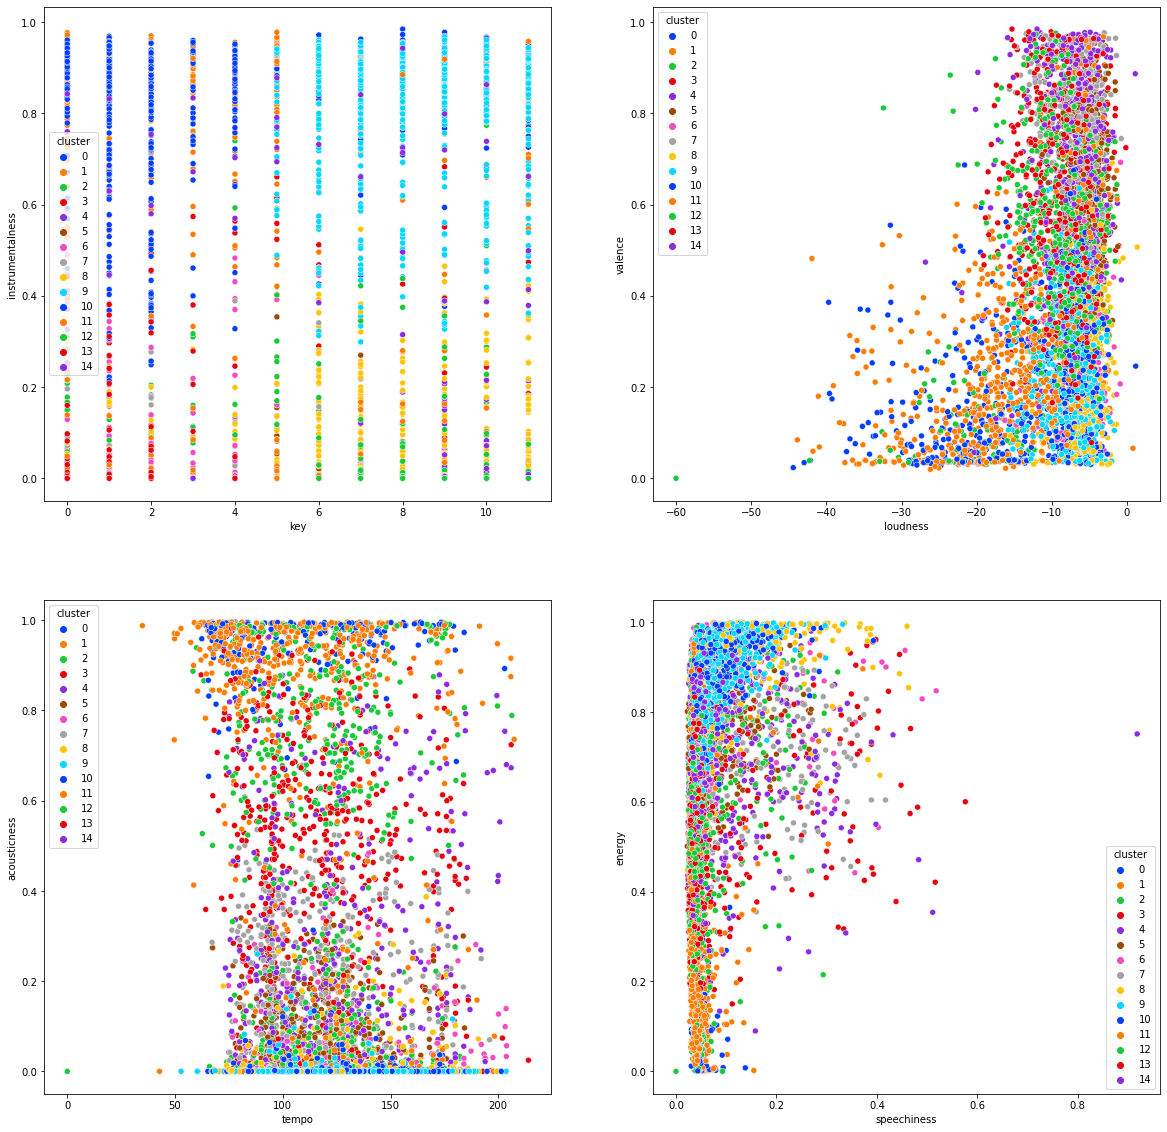

In [67]:
fig, ax = plt.subplots(2,2, figsize=(20, 20))

sns.scatterplot(data = all_clusters_df
            , x = 'key'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = all_clusters_df
            , x = 'loudness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = all_clusters_df
            , x = 'tempo'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = all_clusters_df
            , x = 'speechiness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

In [68]:
all_clusters_df.groupby('cluster')['danceability'].count()

cluster
0     248
1     311
2     535
3     253
4     451
5     519
6     257
7     394
8     553
9     438
10    373
11    297
12    239
13    232
14    135
Name: danceability, dtype: int64

In [69]:
all_clusters_df = all_clusters_df.reset_index().set_index(['name', 'artist','cluster'])

### Scale our Big DF 

In [70]:
#MinMax Scaler
min_max_df = MinMaxScaler().fit_transform(all_clusters_df)
minmax = pd.DataFrame(min_max_df, columns=all_clusters_df.columns, index=all_clusters_df.index)
# Making the DataFrame for the MinMaxed heatmap
all_minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=all_clusters_df.index, columns=all_clusters_df.index)

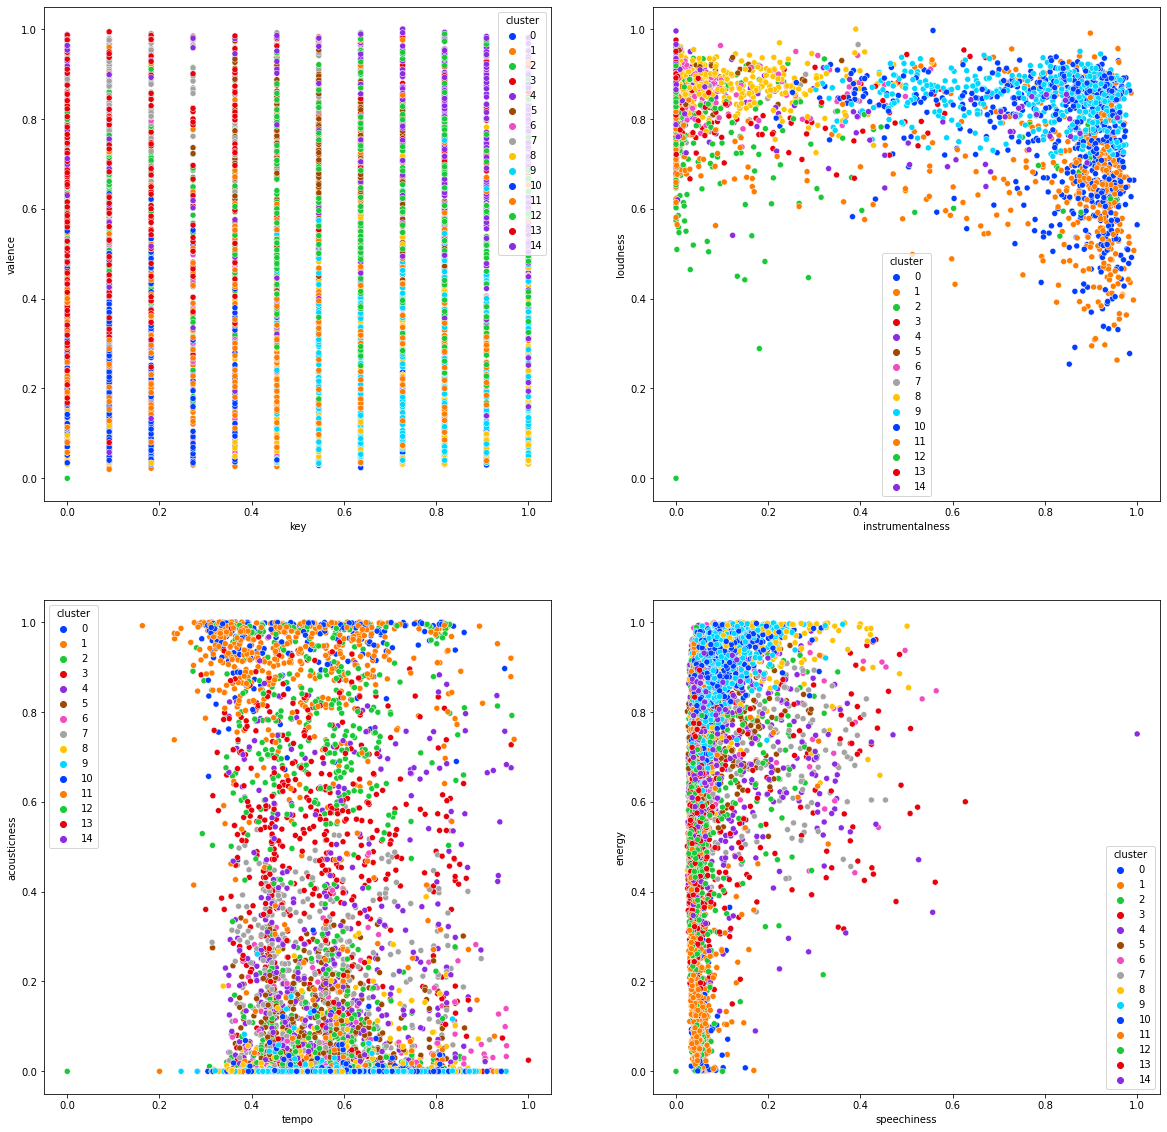

In [71]:
fig, ax = plt.subplots(2,2, figsize=(20, 20))

sns.scatterplot(data = minmax
            , x = 'key'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = minmax
            , x = 'instrumentalness'
            , y = 'loudness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = minmax
            , x = 'tempo'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = minmax
            , x = 'speechiness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Parameters that has a big influence on clustering : 
* key
* valence
* Instrumentalness
* Energy
* Accousticness

Parameters that has a influence on clustering:
* Loudness

tempo and speechiness seem to have not helped much on clustering.

In [72]:
all_clusters_df = all_clusters_df.reset_index()
all_clusters_df.groupby('cluster')[['name', 'artist', 'cluster']].head(5).sort_values(by='cluster')

name  \
3     Aquarela Do Brasil                                                                                                                                                                  
4     O Amor Em Paz                                                                                                                                                                       
22    Albatross - 2018 Remaster                                                                                                                                                           
15    Sigur 1 (Untitled)                                                                                                                                                                  
14    Paranoid Android                                                                                                                                                                    
1     Aquarela Do Brasil                                                                                                                                                                  
2     Brigas Nunca Mais                                                                                                                                                                   
6     Triste                                                                                                                                                                              
7     Apelo                                                                                                                                                                               
11    Insensatez                                                                                                                                                                          
0     Não Sei                                                                                                                                                                             
8       O Que É, O Que É                                                                                                                                                                  
9     Samba Da Minha Terra - Live At Carnegie Hall/1964                                                                                                                                   
5     O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                      
10    Coisa Feita                                                                                                                                                                         
662   Os Grilos                                                                                                                                                                           
663   Laia Ladia                                                                                                                                                                          
658   Aqua De Coco                                                                                                                                                                        
656     Canta Canta, Minha Gente                                                                                                                                                          
657   Brigas Nunca Mais                                                                                                                                                                   
660   Parabens                                                                                                                                                                            
686   There Is An End                                            

In [73]:
all_clusters_df.groupby('artist')['cluster'].nunique().reset_index().agg({'cluster':'mean'})

cluster    1.647518
dtype: float64

It looks like artists are in almost 2 in average clusters which I personnaly find it logical (I believe one artist can and do multiple kind of music)

# WITHOUT SUBCLUSTERING

In [ ]:
songs_for_4_clusters = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_5000')

In [ ]:
songs_for_4_clusters.columns = songs_for_4_clusters.columns.str.strip()

In [ ]:
songs_for_4_clusters.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

## Set up the DF

In [ ]:
songs_for_4_clusters = songs_for_4_clusters.copy()
songs_for_4_clusters.pop('id')
songs_for_4_clusters.pop('html')
songs_for_4_clusters.pop('duration_ms')
songs_for_4_clusters.pop('time_signature')
songs_for_4_clusters.pop('type')
songs_for_4_clusters.pop('mode')

songs_for_4_clusters = songs_for_4_clusters.set_index(['name', 'artist'])


In [ ]:
songs_for_4_clusters.head(3)

danceability  \
name                                                                                                                                                                              artist                                                           
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                             0.658   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                     0.742   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                         0.851   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       0.259   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                               0.399   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                   0.730   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       11   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                2   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                    2   

                                                                                                                                                                                                                                    loudness  \
name                                                                                                                                                                              artist                                                       
Se Eu Quiser Falar Com Deus                                                                                                                                     

In [ ]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(minmax_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(minmax_distances)
# 5. attach the cluster output to our original DataFrame
songs_for_4_clusters["cluster"] = clusters